# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
btc_response_data

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
eth_response_data

# Compute current value of my crpto
my_btc_value = btc_response_data['data']['1']['quotes']['CAD']['price']
my_eth_value = eth_response_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35395.72
The current value of your 5.3 ETH is $2131.47


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
)

In [12]:
# Format current date as ISO format
today_date = pd.Timestamp("2023-08-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe, 
    start = today_date, 
    end = today_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

df_portfolio.head(10)

AGG                                            \
                             open  high    low  close    volume trade_count   
timestamp                                                                     
2023-08-21 04:00:00+00:00  95.255  95.3  95.04  95.14  13362319       42137   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-08-21 04:00:00+00:00  95.119447  437.55  440.11  435.32  439.34   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-08-21 04:00:00+00:00  68735324      525383  437.971885

In [13]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.14
Current SPY closing price: $439.34


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21967.00
The current value of your 200 AGG shares is $19028.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value  #adding together all crypto
stock_bond_assets = my_agg_value + my_agg_value #adding together all stocks and bonds

value_data = {
    'amount': [crypto_assets, stock_bond_assets],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame
df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

amount
asset               
crypto  37527.190415
shares  38056.000000

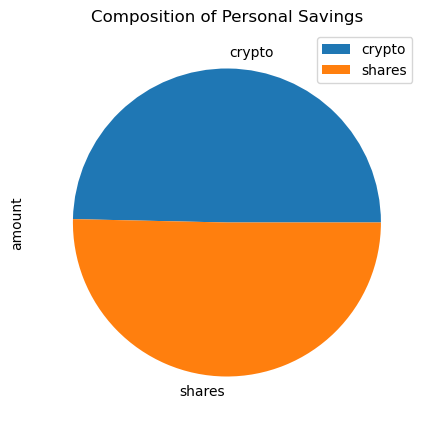

In [17]:
# Plot savings pie chart
pie_chart = df_savings.plot.pie(y= 'amount', title="Composition of Personal Savings", figsize=(5,5))

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
elif total_savings == emergency_fund:
    print(f"You have reached your financial goal!")

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from achieving your financial goal. Keep saving!")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ctzsn\Desktop\Fintech\Work\Unit_5_Financial_Planning\pyFinancial\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997512  0.996605  1.004337  1.003211  0.993994  1.001879  0.994970   
2     0.999524  0.995614  0.999548  1.008733  0.996696  0.994236  0.996366   
3     1.000077  0.990918  0.998786  1.008304  1.000534  1.003750  0.996674   
4     0.991856  0.977379  1.008849  1.007540  1.003422  1.012784  0.996439   
...        ...       ...       ...       ...       ...       ...       ...   
7556  4.807983  6.228020  5.036824  8.176727  3.442714  6.190594  7.512010   
7557  4.795898  6.222620  4.999784  8.147982  3.428413  6.181726  7.483586   
7558  4.776958  6.258387  4.979382  8.094477  3.430514  6.169494  7.476635   
7559  4.806044  6.256837  4.982996  8.152005  3.423341  6.111260  7.448700   
7560  4.753642  6.235736  4.992932  8.189633  3.432662  6.111102  7.512843   

           7          8         9    ...       490       491       492  \
0     1.000000   1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003648   0.994231  1.000309  ...  1.006001  0.995413  1.003048   
2     1.012117   0.993333  0.998297  ...  1.006878  0.996082  0.997858   
3     1.024056   0.997619  0.996495  ...  0.999431  0.993428  0.996826   
4     1.026762   0.995482  1.000299  ...  0.987953  0.988265  1.001224   
...        ...        ...       ...  ...       ...       ...       ...   
7556  9.105640  10.186419  2.369422  ...  7.719659  5.342088  7.635296   
7557  9.087430  10.249307  2.363297  ...  7.746263  5.357865  7.600261   
7558  9.017973  10.212655  2.361080  ...  7.790699  5.368880  7.561212   
7559  9.072326  10.228531  2.355433  ...  7.787648  5.398284  7.587022   
7560  9.095338  10.271006  2.354171  ...  7.784666  5.444348  7.577945   

           493        494       495        496       497       498       499  
0     1.000000   1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  
1     0.998357   1.002550  1.003874   1.003428  0.990465  0.998865  0.999579  
2     0.995113   1.002523  1.003286   1.001283  0.986355  0.992127  0.999956  
3     0.998542   0.995202  1.010514   1.011018  0.985683  0.993744  1.006192  
4     0.996001   0.993446  1.014140   1.017289  0.987709  0.989771  1.005327  
...        ...        ...       ...        ...       ...       ...       ...  
7556  5.585861  10.172186  4.329472  13.583692  5.021023  6.173119  5.016063  
7557  5.631093  10.116144  4.317690  13.575037  4.998256  6.170768  4.980327  
7558  5.642921  10.151673  4.351624  13.560803  5.028452  6.168223  5.005989  
7559  5.613498  10.221631  4.326707  13.558241  5.072897  6.165619  5.004215  
7560  5.605155  10.194676  4.357324  13.579045  5.036484  6.146130  5.026587  

[7561 rows x 500 columns]

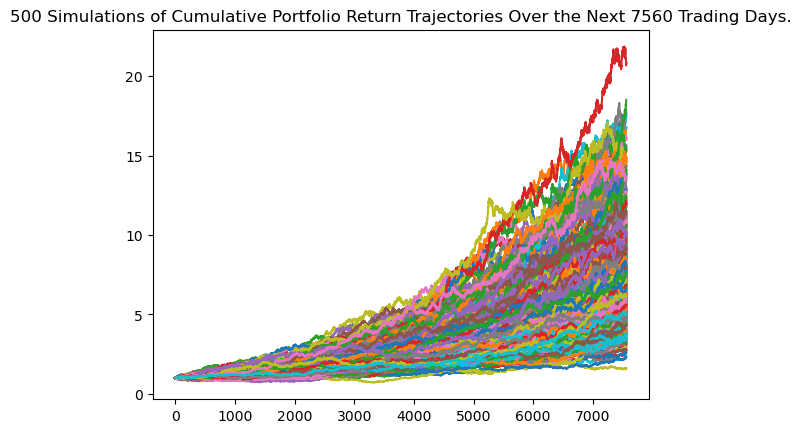

In [25]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

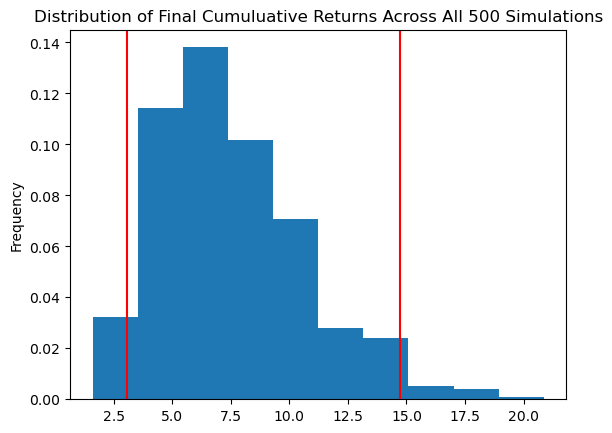

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.547688
std               3.147023
min               1.602773
25%               5.258758
50%               7.019797
75%               9.356196
max              20.864070
95% CI Lower      3.051540
95% CI Upper     14.742197
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61030.79 and $294843.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91546.19 and $442265.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
#Set number of simulations
num_sims = 500

MC_portfolio_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ctzsn\Desktop\Fintech\Work\Unit_5_Financial_Planning\pyFinancial\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003955  0.997802  0.998144  0.994587  0.998737  0.998546  0.999019   
2     1.004015  0.991836  0.997931  0.991126  0.997841  0.998234  0.997155   
3     1.005150  0.990011  1.000923  0.994958  0.997240  0.996782  0.995287   
4     1.000416  0.993324  0.997371  0.994875  0.995754  0.997824  0.990054   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.115199  1.297226  1.144120  1.334203  1.064187  1.000791  1.265438   
1257  1.120452  1.294743  1.152071  1.334951  1.068528  1.006335  1.267264   
1258  1.124034  1.289629  1.149765  1.331249  1.069973  1.005928  1.267400   
1259  1.126337  1.284738  1.145249  1.335503  1.068967  1.003197  1.269389   
1260  1.121554  1.284787  1.141738  1.337801  1.067140  1.004401  1.268084   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003302  0.998793  0.999633  ...  1.002066  1.005014  0.998406   
2     1.003290  1.001481  0.996031  ...  1.005503  1.002312  0.999659   
3     1.005649  1.003165  0.999886  ...  1.004206  1.002004  1.001045   
4     1.003456  0.997365  1.002176  ...  1.011524  1.001384  1.000110   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.146997  1.072776  1.138230  ...  0.992680  1.300252  1.290410   
1257  1.148906  1.068674  1.136045  ...  0.992120  1.296083  1.290184   
1258  1.145864  1.066565  1.140601  ...  0.991310  1.287182  1.293609   
1259  1.154106  1.064473  1.140541  ...  0.992574  1.294179  1.292680   
1260  1.153659  1.071685  1.145956  ...  0.993567  1.295174  1.296795   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997076  0.998661  1.000725  0.995025  0.997668  1.002154  1.000576  
2     0.996725  1.000202  1.005640  0.993285  1.001621  1.001820  0.997432  
3     0.994364  1.005330  1.007278  0.990606  1.001594  0.994381  0.999066  
4     0.997252  1.007811  1.010772  0.992003  1.000723  0.996125  1.002019  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.213465  1.238159  1.256624  1.342725  1.332957  1.012247  1.201578  
1257  1.216360  1.235485  1.253129  1.338526  1.336656  1.015066  1.207886  
1258  1.216617  1.236421  1.254654  1.346040  1.343902  1.016233  1.201761  
1259  1.215777  1.239125  1.262278  1.346293  1.344362  1.018792  1.204768  
1260  1.215309  1.245236  1.263259  1.348938  1.349036  1.020306  1.205724  

[1261 rows x 500 columns]

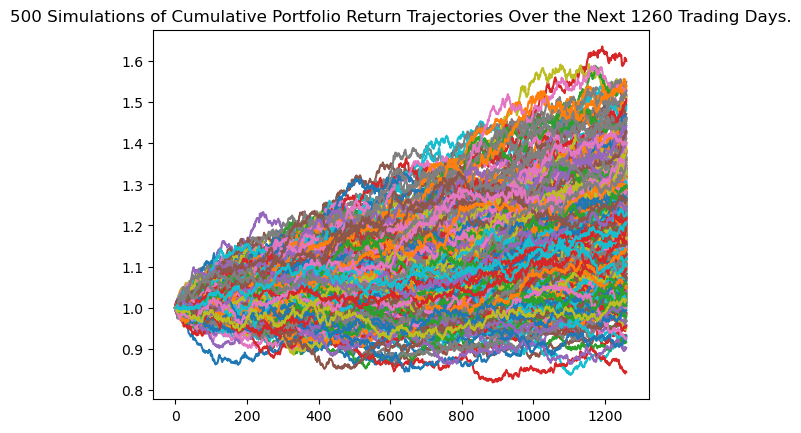

In [33]:
# Plot simulation outcomes
line_plot_5y = MC_portfolio_5y.plot_simulation()

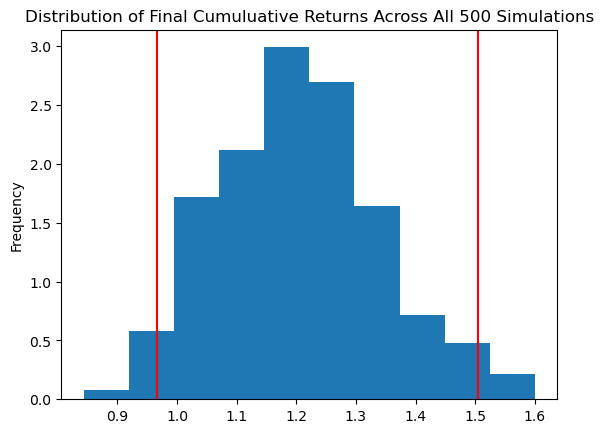

In [34]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_portfolio_5y.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5y = MC_portfolio_5y.summarize_cumulative_return()

# Print summary statistics
print(tbl_5y)

count           500.000000
mean              1.204724
std               0.135740
min               0.843826
25%               1.105201
50%               1.199709
75%               1.292374
max               1.599912
95% CI Lower      0.966946
95% CI Upper      1.504993
Name: 1260, dtype: float64


In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5y[8]*initial_investment,2)
ci_upper_five = round(tbl_5y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19338.93 and $30099.86


### Ten Years Retirement Option

In [40]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
#Set number of simulations
num_sims = 500

MC_portfolio_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.8,0.2],  #changed weights of stocks vs. bonds for a more aggressive/riskier portfolio
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ctzsn\Desktop\Fintech\Work\Unit_5_Financial_Planning\pyFinancial\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.996565  0.993442  0.997029  0.996632  0.999027  0.996770  0.998722   
2     0.998786  0.990125  0.994412  0.993241  1.002350  0.995255  0.997780   
3     0.996491  0.992764  0.995521  0.994813  1.003923  1.002742  0.999671   
4     0.994196  0.993786  0.994195  0.995665  1.007358  1.001229  0.999880   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.432882  1.623183  1.775663  1.549913  1.545341  1.980912  1.297940   
2517  1.425838  1.624448  1.780279  1.548274  1.551045  1.975436  1.292811   
2518  1.425954  1.622944  1.773896  1.541559  1.549557  1.967040  1.287423   
2519  1.425158  1.625102  1.769835  1.546298  1.551029  1.974995  1.280810   
2520  1.418877  1.630797  1.766921  1.550719  1.557814  1.985662  1.278666   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000377  0.998811  0.998060  ...  1.003635  0.999636  0.996364   
2     1.001509  0.999049  0.999584  ...  1.008417  1.004445  1.002118   
3     1.002047  1.000366  0.997432  ...  1.010783  1.005334  0.999745   
4     1.001228  1.001860  0.995733  ...  1.010014  1.007024  0.998138   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.771246  1.316202  1.621840  ...  1.804448  1.537429  1.273607   
2517  1.769989  1.310431  1.619312  ...  1.794930  1.532540  1.266687   
2518  1.771218  1.309721  1.617718  ...  1.787167  1.535758  1.264453   
2519  1.766519  1.310100  1.619933  ...  1.790602  1.536823  1.259295   
2520  1.765082  1.308997  1.617070  ...  1.783776  1.540844  1.256320   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.999787  1.001865  1.000238  1.000499  0.996478  0.999811  0.998408  
2     1.002922  1.002143  0.999342  0.998014  0.999224  1.002059  0.999997  
3     1.004487  0.998600  0.994959  0.995375  1.005015  1.002964  1.000419  
4     1.009025  0.995084  0.992870  0.995213  1.008360  1.001577  1.002965  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.343653  1.672391  1.839093  1.306976  1.690930  1.988562  1.466781  
2517  1.346249  1.675257  1.833046  1.310694  1.696529  1.978074  1.459985  
2518  1.349493  1.677311  1.835651  1.315315  1.697472  1.981665  1.458316  
2519  1.352328  1.684492  1.839271  1.306970  1.704802  1.982354  1.460448  
2520  1.350588  1.687205  1.843654  1.306537  1.706612  1.988941  1.462020  

[2521 rows x 500 columns]

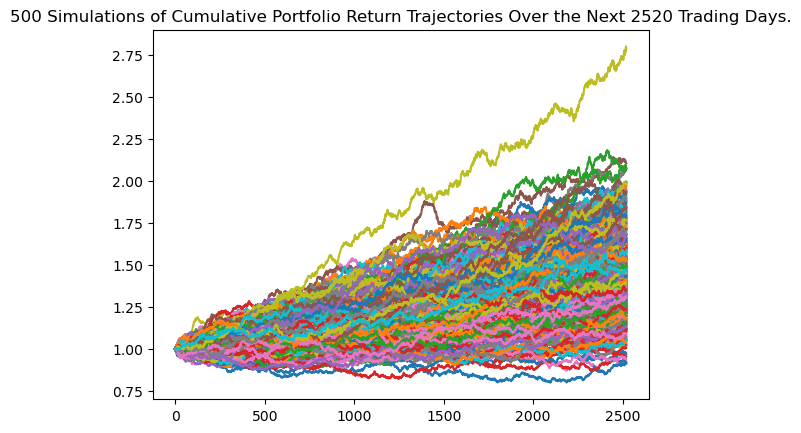

In [42]:
# Plot simulation outcomes
line_plot_10y = MC_portfolio_10y.plot_simulation()

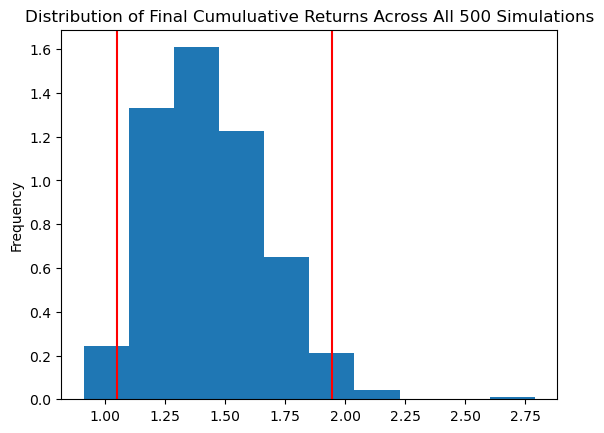

In [43]:
# Plot probability distribution and confidence intervals
dist_plot_10y = MC_portfolio_10y.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10y = MC_portfolio_10y.summarize_cumulative_return()

# Print summary statistics
print(tbl_10y)

count           500.000000
mean              1.441598
std               0.239733
min               0.911674
25%               1.259266
50%               1.427563
75%               1.596777
max               2.789363
95% CI Lower      1.047852
95% CI Upper      1.942678
Name: 2520, dtype: float64


In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10y[8]*initial_investment,2)
ci_upper_ten = round(tbl_10y[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20957.05 and $38853.56
